In [1]:
import math
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

import sys

sys.path.append("../src/")
import utils
from NaCL import NaCLK

In [2]:
from torchvision import datasets, transforms

In [3]:
%load_ext autoreload
%autoreload 2

## Loading Data and Binarizing it

In [4]:
train = datasets.MNIST('../data', train=True, download=True)
test = datasets.MNIST('../data', train=False, download=True)

X_train = train.data.numpy().reshape(-1, 28*28)
y_train = train.targets.numpy()

X_test = test.data.numpy().reshape(-1, 28*28)
y_test = test.targets.numpy()

In [5]:
train_mean = np.mean(X_train, axis=0)
train_std  = np.std(X_train, axis=0)

trainZ = X_train <= train_mean + 0.05 * train_std

test_mean = np.mean(X_test, axis=0)
test_std  = np.std(X_test, axis=0)

testZ = X_test <= test_mean + 0.05 * test_std

nZ  = np.logical_not(trainZ)
tnZ = np.logical_not(testZ)

X_train[trainZ] = 0
X_train[nZ] = 1
X_test[testZ] = 0
X_test[tnZ] = 1

X_train = X_train.reshape(-1, 28*28)
X_test  = X_test.reshape(-1, 28*28)

In [6]:
%%time
from sklearn.naive_bayes import BernoulliNB
NB = BernoulliNB().fit(X_train, y_train)
print(np.average(NB.predict(X_test) == y_test))

0.8375
CPU times: user 6.56 s, sys: 252 ms, total: 6.81 s
Wall time: 6.63 s


In [7]:
clf, aData = utils.load("../pretrained/mnistk_meanbinarized_785.pickle",  encoding='latin1')
nacl = NaCLK().load(aData)

/home/pasha/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/pasha/.local/lib/python3.6/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.20.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [8]:
%%time
np.average(np.mean(nacl.predict(X_test) == y_test)), np.average(clf.predict(X_test) == y_test)

CPU times: user 1.25 s, sys: 849 ms, total: 2.1 s
Wall time: 218 ms


(0.9172, 0.9172)

# Missing Data

In [9]:
accuracy = lambda x,y: np.mean( x == y )

In [10]:
%%time
setting = {
    "repeat": 1,#10
    "k": [i for i in range(0, 800, 20)],
    "prob" : True,
    "function": utils.conditional_likelihood_k
}
data_a2 = utils.run_experiment_k_paper(X_test, y_test, clf, NB, nacl, setting)

Using following function: 
<function conditional_likelihood_k at 0x7fa38eb7e488>
Possible features to remove: 784
K = 0
	 R = 0
K = 20
	 R = 0
K = 40
	 R = 0
K = 60
	 R = 0
K = 80
	 R = 0
K = 100
	 R = 0
K = 120
	 R = 0
K = 140
	 R = 0
K = 160
	 R = 0
K = 180
	 R = 0
K = 200
	 R = 0
K = 220
	 R = 0
K = 240
	 R = 0
K = 260
	 R = 0
K = 280
	 R = 0
K = 300
	 R = 0
K = 320
	 R = 0
K = 340
	 R = 0
K = 360
	 R = 0
K = 380
	 R = 0
K = 400
	 R = 0
K = 420
	 R = 0
K = 440
	 R = 0
K = 460
	 R = 0
K = 480
	 R = 0
K = 500
	 R = 0
K = 520
	 R = 0
K = 540
	 R = 0
K = 560
	 R = 0
K = 580
	 R = 0
K = 600
	 R = 0
K = 620
	 R = 0
K = 640
	 R = 0
K = 660
	 R = 0
K = 680
	 R = 0
K = 700
	 R = 0
K = 720
	 R = 0
K = 740
	 R = 0
K = 760
	 R = 0
K = 780
	 R = 0
CPU times: user 3min 47s, sys: 2min 24s, total: 6min 12s
Wall time: 57.7 s


<module 'matplotlib.pyplot' from '/home/pasha/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

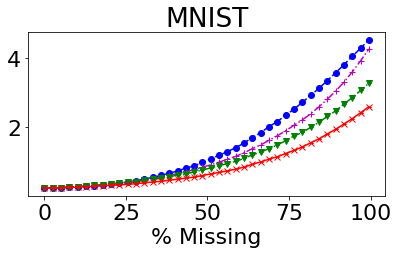

In [11]:
setting = {
    "show": ["min", "ours", "mean", "median"],
    "saveAs": "../results/mnistk_cross.pdf",
    "title": "MNIST",
    "Ylabel": "",#"Cross Entropy",
    "Xlabel": "% Missing",
    "legend": False,
    "size": (6,4)
}
utils.plot_results_paper(data_a2, setting)

In [12]:
%%time
accuracy = lambda x,y: np.mean(x == y)
setting = {
    "repeat": 1, #10
    "k": [i for i in range(0, 800, 20)],
    "prob" : False,
    "function": accuracy
}
data_a3 = utils.run_experiment_k_paper(X_test, y_test, clf, NB, nacl, setting)

Using following function: 
<function <lambda> at 0x7fa335ed5158>
Possible features to remove: 784
K = 0
	 R = 0
K = 20
	 R = 0
K = 40
	 R = 0
K = 60
	 R = 0
K = 80
	 R = 0
K = 100
	 R = 0
K = 120
	 R = 0
K = 140
	 R = 0
K = 160
	 R = 0
K = 180
	 R = 0
K = 200
	 R = 0
K = 220
	 R = 0
K = 240
	 R = 0
K = 260
	 R = 0
K = 280
	 R = 0
K = 300
	 R = 0
K = 320
	 R = 0
K = 340
	 R = 0
K = 360
	 R = 0
K = 380
	 R = 0
K = 400
	 R = 0
K = 420
	 R = 0
K = 440
	 R = 0
K = 460
	 R = 0
K = 480
	 R = 0
K = 500
	 R = 0
K = 520
	 R = 0
K = 540
	 R = 0
K = 560
	 R = 0
K = 580
	 R = 0
K = 600
	 R = 0
K = 620
	 R = 0
K = 640
	 R = 0
K = 660
	 R = 0
K = 680
	 R = 0
K = 700
	 R = 0
K = 720
	 R = 0
K = 740
	 R = 0
K = 760
	 R = 0
K = 780
	 R = 0
CPU times: user 3min 33s, sys: 2min 7s, total: 5min 41s
Wall time: 59.3 s


<module 'matplotlib.pyplot' from '/home/pasha/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

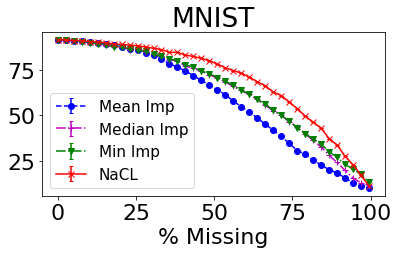

In [13]:
setting = {
    "show": ["ours", "min", "mean", "median"],
    "saveAs": "../results/mnistk_accuracy.pdf",
    "title": "MNIST",
    "Ylabel": "",
    "Xlabel": "% Missing",
    "legend": True,
    "size": (6,4),
    "mult": 100.0
}
utils.plot_results_paper(data_a3, setting)

In [14]:
utils.save("../results/data_mnistk_result_cross.pickle", data_a2)
utils.save("../results/data_mnistk_result_accuracy.pickle", data_a3)